In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df['GrLivArea'] = train_df['GrLivArea'].fillna(train_df['GrLivArea'].median())
train_df['BedroomAbvGr'] = train_df['BedroomAbvGr'].fillna(train_df['BedroomAbvGr'].mode()[0])
train_df['FullBath'] = train_df['FullBath'].fillna(train_df['FullBath'].mode()[0])


In [4]:
train_df.rename(columns={'GrLivArea': 'SquareFootage', 'BedroomAbvGr': 'Bedrooms', 'FullBath': 'Bathrooms'}, inplace=True)

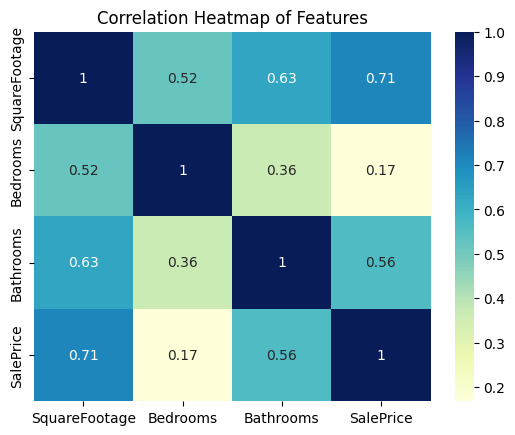

In [5]:
features = ['SquareFootage', 'Bedrooms', 'Bathrooms', 'SalePrice']
sns.heatmap(train_df[features].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Features")
plt.show()


In [6]:
train_df = train_df[train_df['SquareFootage'] < 4000]
train_df = train_df[train_df['SalePrice'] < 500000]

In [7]:
X = train_df[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = train_df['SalePrice']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test_scaled)

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [13]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 34205.49552134615
Mean Squared Error (MSE): 2183721377.2510386
Root Mean Squared Error (RMSE): 46730.30469888933


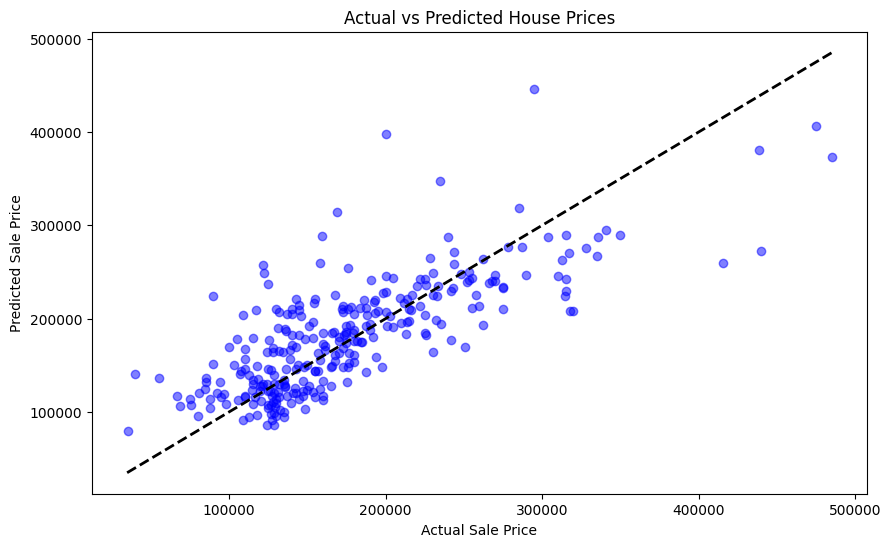

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


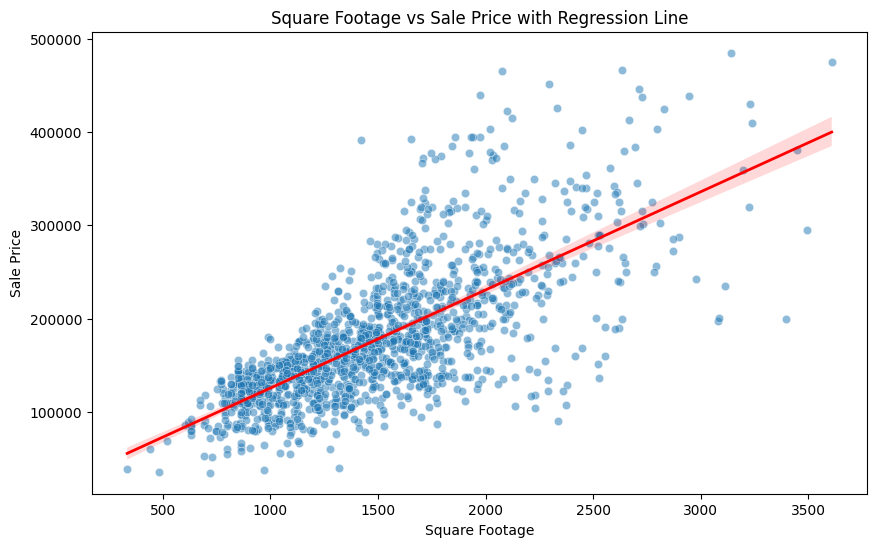

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareFootage', y='SalePrice', data=train_df, alpha=0.5)
sns.regplot(x='SquareFootage', y='SalePrice', data=train_df, scatter=False, color="red", line_kws={"lw":2})
plt.xlabel("Square Footage")
plt.ylabel("Sale Price")
plt.title("Square Footage vs Sale Price with Regression Line")
plt.show()

In [19]:
single_house = pd.DataFrame({
    'SquareFootage': [2500], 
    'Bedrooms': [4],         
    'Bathrooms': [2]      
})


single_house_scaled = scaler.transform(single_house)


predicted_price_single = model.predict(single_house_scaled)


print(f"The predicted sale price for the house is: ${predicted_price_single[0]:,.2f}")

The predicted sale price for the house is: $274,111.45
